## Multivariate Statistical Analysis

### Homework 5

12112627 李乐平

**Qustion 5.4**

From the previous experience, the humidity difference(湿度差) between today and yesterday，the difference between air pressure and temperature (压温差) todayare two important factors for predicting whether it rains or not tomorrow. A batch of sample data is now collected and listed in the table below.

Now we observed $x_1 = 0.6$, $x_2 = 0.3$. Assume that there is the same covariance matrix for the two groups  and  Please answer the following questions:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
df_5_4 = pd.read_excel("data_5_4.xlsx")
df_5_4

C:\Users\Wandering Troubadour\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,湿度差,压温差,组别
0,-1.9,3.2,1
1,-6.9,10.4,1
2,5.2,2.0,1
3,5.0,2.5,1
4,7.3,0.0,1
5,6.8,12.7,1
6,0.9,-15.4,1
7,-12.5,-2.5,1
8,1.5,1.3,1
9,3.8,6.8,1


**(1)** To give the distance discrimination rule and forecast whether it will rain or not tomorrow. 

In [3]:
n1 = 10
n2 = 10
n = 20
g1 = df_5_4["组别"] == 1
g2 = df_5_4["组别"] == 2
x1_avg = np.array(df_5_4[g1].mean().iloc[0 : 2]).reshape(-1, 1)
x2_avg = np.array(df_5_4[g2].mean().iloc[0 : 2]).reshape(-1, 1)
x_avg = np.array(df_5_4.mean().iloc[0 : 2]).reshape(-1, 1)

S1 = np.array(df_5_4[g1].cov().iloc[0 : 2, 0 : 2])
S2 = np.array(df_5_4[g2].cov().iloc[0 : 2, 0 : 2])
Sp = (S1 + S2) / 2
Sp_inv = np.linalg.inv(Sp)
a = (Sp_inv @ (x1_avg - x2_avg))
a

array([[ 0.07804182],
       [-0.17857643]])

In [4]:
x0 = np.array(pd.DataFrame({"湿度差": [0.6], "压温差": [0.3]})).reshape(-1, 1)
W_x = a.T @ (x0 - x_avg)
W_x

array([[0.94988685]])

**Answer:**
The discrimination law is given by
$$
W(x) = \begin{bmatrix}
    0.07804182 \\
    -0.17857643
\end{bmatrix}^\intercal
 (x - \bar{x})
$$
$$
x ∈ \begin{cases} 
      \pi_1, & W(x) ≥ 0 \\
      \pi_2, & W(x) < 0 
   \end{cases}
$$

Since $W(x_0) = 0.94988685 > 0$, we may assert that it will rain tomorrow.

**(2)**
Assume $x = (x_1, x_2)$ follows a bivariate normal distribution in the above two groups and the prior probability $p_1 = 0.4$, $p_2 = 0.6$, try to predict whether it will rain or not tomorrow based on the maximum posterior probability criterion (最大后验概率准则).

In [5]:
p1 = 0.4
p2 = 0.6
I1 = Sp_inv @ x1_avg
I2 = Sp_inv @ x2_avg
c1 = - x1_avg.T @ Sp_inv @ x1_avg / 2
c2 = - x2_avg.T @ Sp_inv @ x2_avg / 2
P1 = np.exp(I1.T @ x0 + c1 + np.log(p1)) / (np.exp(I1.T @ x0 + c1 + np.log(p1)) + np.exp(I2.T @ x0 + c2 + np.log(p2)))
P2 = np.exp(I2.T @ x0 + c2 + np.log(p2)) / (np.exp(I1.T @ x0 + c1 + np.log(p1)) + np.exp(I2.T @ x0 + c2 + np.log(p2)))
P1, P2

(array([[0.63284043]]), array([[0.36715957]]))

**Answer:**
The discrimination law is given by

$$
x∈\arg\max_{\pi_i}\Pr(π_i|x) = \frac{\exp(I_i'x + c_i + \ln p_i)}{\sum_{j = 1}^{k}\exp(I_j'x + c_j + \ln p_j)}
$$

Since $\Pr(π_1|x) = 0.63284043 > \Pr(π_2|x) = 0.36715957 $, we may assert that it will rain tomorrow.

**(3)**
3)If you are thinking about arranging an activity for tomorrow, but this activity is not suitable for rainy days. Assume that c(2|1) = 3c(1|2), so should you schedule this activity for tomorrow today? 

In [6]:
# c(2|1) = 3c(1|2)
thresh = np.log(p2 / 3 / p1)
W_x, thresh

(array([[0.94988685]]), -0.6931471805599454)

**Answer:**
The discrimination law is given by
$$
W(x) = \begin{bmatrix}
    0.07804182 \\
    -0.17857643
\end{bmatrix}^\intercal
 (x - \bar{x})
$$
$$
x ∈ \begin{cases} 
      \pi_1, & W(x) ≥ \ln\frac{c(1|2)p_2}{c(2|1)p_1} \\
      \pi_2, & W(x) < \ln\frac{c(1|2)p_2}{c(2|1)p_1} 
   \end{cases}
$$

Since $W(x_0) = 0.94988685 > \ln\frac{c(1|2)p_2}{c(2|1)p_1} = -0.6931$, we may assert that it will rain tomorrow.


.

.

**Qustion 5.7**

The following table shows the data of breakfast porridge produced by three American manufacturers I, II, III. The breakfast porridge (粥) brands were grouped according to the manufacturers. The indicators of each brand were: calories ($x_1$), protein ($x_2$), fat ($x_3$), sodium ($x_4$), fiber ($x_5$), carbohydrate ($x_6$), sugar ($x_7$) and potassium ($x_8$). We collected the sample from the three groups as follows:

In [7]:
df_5_7 = pd.read_excel("data_5_7.xlsx")

df_5_7

C:\Users\Wandering Troubadour\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,卡路里,蛋白质,脂肪,钠,纤维,碳水化合物,糖,钾,组别
0,110,2,2,180,1.5,10.5,10,70,1
1,110,6,2,290,2.0,17.0,1,105,1
2,110,1,1,180,0.0,12.0,13,55,1
3,110,1,1,180,0.0,12.0,13,65,1
4,110,1,1,280,0.0,15.0,9,45,1
5,110,3,1,250,1.5,11.5,10,90,1
6,110,2,1,260,0.0,21.0,3,40,1
7,110,2,1,180,0.0,12.0,12,55,1
8,100,2,1,220,2.0,15.0,6,90,1
9,130,3,2,170,1.5,13.5,10,120,1


Assume that there is a common covariance matrix for the tree population groups.

**(1)**
Try to give Fisher discriminant, and report discrimination results of the samples for different groups I, II, III in the above table with the following table.


In [8]:
data = np.array(df_5_7[["卡路里", "蛋白质", "脂肪", "钠", "纤维", "碳水化合物", "糖", "钾"]])
data_avg = np.mean(data, axis = 0).reshape(-1, 1)
data_h_avg = [np.mean(data[df_5_7["组别"] == h], axis = 0).reshape(-1, 1) for h in np.sort(df_5_7["组别"].unique())]

Sp = np.sum([
    (np.sum(df_5_7["组别"] == h) - 1) * np.array(df_5_7[df_5_7["组别"] == h].cov().iloc[0 : 8, 0 : 8]) \
    for h in np.sort(df_5_7["组别"].unique())
], axis = 0) / (len(df_5_7) - 3)

B = np.sum([
    np.sum(df_5_7["组别"] == h) * ((data_h_avg[h - 1] - data_avg) @ (data_h_avg[h - 1] - data_avg).T) \
    for h in np.sort(df_5_7["组别"].unique())
], axis = 0)
E = np.sum([
    np.sum([
        (data[i].reshape(-1, 1) - data_h_avg[h - 1]) @ (data[i].reshape(-1, 1) - data_h_avg[h - 1]).T \
        for i in df_5_7.loc[df_5_7["组别"] == h].index
    ], axis = 0) \
    for h in np.sort(df_5_7["组别"].unique())
], axis = 0)
E_inv = np.linalg.inv(E)
eigvl, eigv = np.linalg.eig(E_inv @ B)
eigvl, eigv = np.real(eigvl), np.real(eigv)
for i in range(eigv.shape[1]):
    t = eigv[:, i]
    t_dot_Sp_t = np.dot(np.dot(t, Sp), t)
    normalized_t = t / np.sqrt(t_dot_Sp_t)
    eigv[:, i] = normalized_t


In [15]:
discr = np.zeros([3, 3])
fis = []
discr_data = []
for ind, r in df_5_7.iterrows():
    tmp = [[
        (eigv[:, i].reshape(-1, 1).T @ (data[ind].reshape(-1, 1) - data_h_avg[l - 1]))[0][0] \
        for i in range(2) \
    ] for l in np.sort(df_5_7["组别"].unique())]
    fisher_score = [[
        (eigv[:, i].reshape(-1, 1).T @ (data[ind].reshape(-1, 1) - data_avg))[0][0] \
        for i in range(2) \
    ] for l in np.sort(df_5_7["组别"].unique())]
    f = [
        np.sum([it ** 2 for it in its]) for its in tmp
    ]
    d = np.argmin(f)
    discr_data.append(d)
    fis.append(fisher_score[d])
    discr[int(r["组别"] - 1)][d] += 1
    
discr

array([[15.,  2.,  0.],
       [ 3., 16.,  1.],
       [ 3.,  0.,  3.]])

**Answer:**

| ↓True \ Discriminated as→ | I | II | III | Sum |
|---------|---------|---------|---------|--------|
| I | 15 | 2 | 0 | 17 |
| II | 3 | 16 | 1 | 20 |
| III | 3 | 0 | 3 | 6 |
| Sum | 21 | 18 | 4 | 43 |

**(2)**
Report the misclassification probabilities based on the above table (Reuse of samples is allowed).

**Answer:**

By the table above, we can easily get:

p(2|1) = 2 / 17, p(3|1) = 0

p(1|2) = 3 / 20, p(3|2) = 1 / 20

p(1|3) = 1 / 2, p(2|3) = 0

.

**(3)**
Draw the two discriminant scores of all brands into a scatter diagram, and use different symbols to represent different manufacturers.

**Answer:**


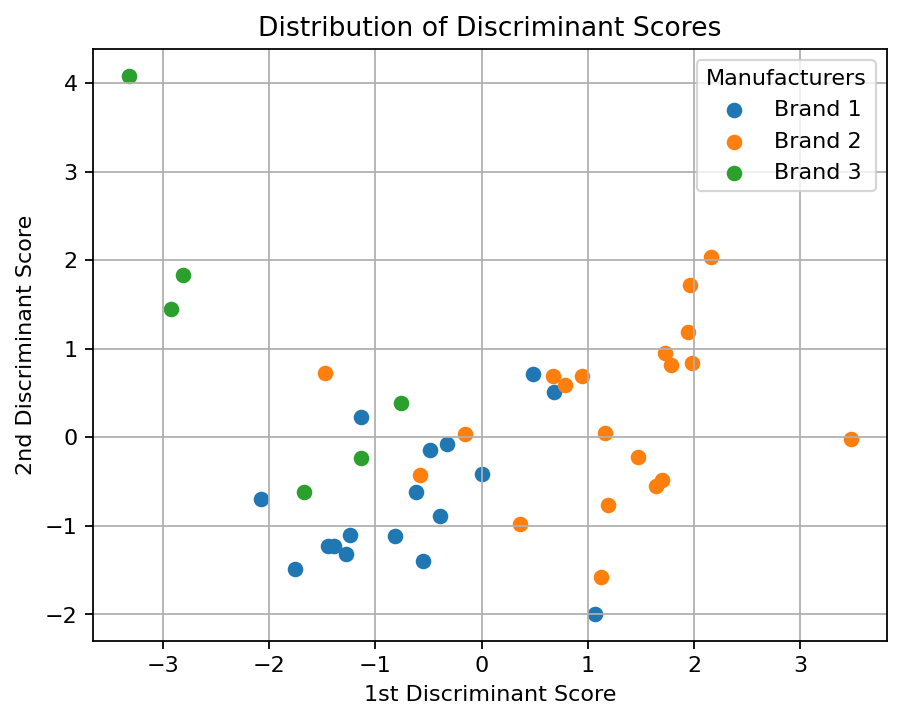

In [17]:
fis = np.array(fis)
plt.figure(dpi = 160)

for i in range(1, 4):
    group_data = fis[(df_5_7["组别"] == i)]
    plt.scatter(group_data[:, 0], group_data[:, 1], label=f"Brand {i}")

plt.title("Distribution of Discriminant Scores")
plt.xlabel("1st Discriminant Score")
plt.ylabel("2nd Discriminant Score")
plt.legend(title = "Manufacturers")
plt.grid(True)
plt.show()